# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to
investigate the following :

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv("Sales_data_zone_wise.csv")
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [61]:
data.shape

(29, 5)

In [38]:
data.dtypes

Month       object
Zone - A     int64
Zone - B     int64
Zone - C     int64
Zone - D     int64
dtype: object

In [63]:
data.isnull().sum().sum()

0

In [64]:
data.nunique()

Month       29
Zone - A    29
Zone - B    29
Zone - C    29
Zone - D    29
dtype: int64

In [65]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


● The mean sales generated by each zone

In [66]:
print("The MEAN sales generated by ZONE - A = " ,data["Zone - A"].mean())
print("The MEAN sales generated by ZONE - B = " ,data["Zone - B"].mean())
print("The MEAN sales generated by ZONE - C = " ,data["Zone - C"].mean())
print("The MEAN sales generated by ZONE - D = " ,data["Zone - D"].mean())

The MEAN sales generated by ZONE - A =  1540493.1379310344
The MEAN sales generated by ZONE - B =  1755559.5862068965
The MEAN sales generated by ZONE - C =  1772871.0344827587
The MEAN sales generated by ZONE - D =  1842926.7586206896


The mean sales generated by Zone D is greater than other Zones.
The mean sales generated by Zone A is lesser than other Zones

● Total sales generated by all the zones for each month.

In [69]:
print("Total sales generated by all the zones for each month.")
data["Total"] = data["Zone - A"] + data["Zone - B"] + data["Zone - C"] +data["Zone - D"]
data


Total sales generated by all the zones for each month.


,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


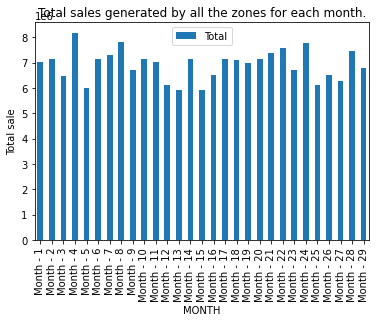

In [70]:
data.plot(x="Month",y="Total",kind="bar")
plt.title("Total sales generated by all the zones for each month.")
plt.xlabel("MONTH")
plt.ylabel("Total sale")
plt.show()

From the graph we found out that total sale generated by all the zones greater in the Month 4 and lesser in the Month 13

● Check whether all the zones generate the same amount of sales.

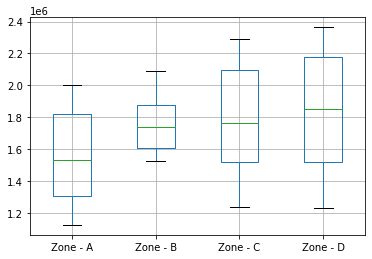

In [71]:
data[['Zone - A',"Zone - B","Zone - C","Zone - D"]].boxplot()
plt.show()

We can use ANOVA test to compare all the zones generate the same amount of sales or not

In [74]:
#H0:All the zones generate the same amount of sales
#Ha :All the zones generate different amount of sales

In [75]:
import scipy.stats as stats
from scipy.stats import f_oneway

In [81]:
A =data["Zone - A"]
B=data["Zone - B"]
C=data["Zone - C"]
D=data["Zone - D"]

In [82]:
fvalue, pvalue = stats.f_oneway( A,B,C,D)
print("f value",fvalue," ,p vaue" ,pvalue)

f value 5.672056106843581  ,p vaue 0.0011827601694503335


In [84]:
alpha =0.05
if(pvalue<=alpha): 
    print("Rejecting the Null hypothesis H0")
else:
    print("Failing to reject the Null hypothesis Ha")

Rejecting the Null hypothesis H0


p value obtained from the ANOVA test is less than alpha value we can reject NULL hypothesis,we can conclude that All the zones generate different amount of sales